## Probability & Statistics

###　代表値・統計量
データ分析において、最初に確認すべき量
* 平均値（mean）：　データの合計をデータ数で割ったもの
* 中央値(median)：　 データを大きさ順に並べて中央に位置するデータ値
* 分散：　対象のデータが平均からどれだけばらつきがあるか。
* 標準偏差：　分散の平方根

#### 平均値・中央値・標準偏差の計算

In [1]:
import numpy as np

# 外れ値なし
x = [3, 4, 5, 3, 4, 5, 3, 4, 5]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))
# 外れ値あり
x = [3, 4, 5, 3, 4, 5, 3, 4, 5, 100]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))

外れ値なしの数値のリスト
平均値： 4.0
中央値： 4.0
標準偏差 0.816496580927726
外れ値なしの数値のリスト
平均値： 13.6
中央値： 4.0
標準偏差 28.810414783546594


#### 売り上げ金額と気温の散布図

MEMO 大小関係がない値をカテゴリ変数と呼ぶ

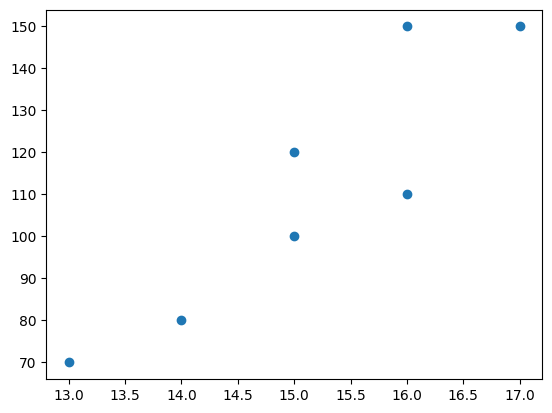

In [2]:
import matplotlib.pyplot as plt

# 気温と売り上げの一週間分の記録を保持したリスト
pair_list = [(15, 120), (14, 80), (17, 150), (16, 150), (16, 110), (15, 100), (13, 70)]

# 売り上げ金額を縦軸、気温を横軸とした散布図（scatter plot）
plt.scatter([x for x, y in pair_list], [y for x, y in pair_list])

Memo 気温と売り上げ金額は比例関係にありそうということがわかる

#### 相関係数
$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$

In [3]:
# 相関係数の計算
x_i = [x for x, y in pair_list]
y_i = [y for x, y in pair_list]
x_bar = np.mean(x_i)
y_bar = np.mean(y_i)
# 分子
numerator = np.sum([(x - x_bar) * (y - y_bar) for x, y in pair_list])
# 分母
denominator1 = np.sqrt(np.sum([(x - x_bar) ** 2 for x in x_i]))

denominator2 = np.sqrt(np.sum([(y - y_bar) ** 2 for y in y_i]))

r_xy = numerator / (denominator1 * denominator2)
r_xy

0.9042001578168488

### 確率と確率分布

(array([1000195., 1000140., 1000428., 1000385., 1000643.,  999062.,
         999490.,  999572., 1001391.,  998694.]),
 array([6.05100547e-09, 9.99999971e-02, 1.99999988e-01, 2.99999979e-01,
        3.99999970e-01, 4.99999961e-01, 5.99999952e-01, 6.99999943e-01,
        7.99999934e-01, 8.99999926e-01, 9.99999917e-01]),
 <BarContainer object of 10 artists>)

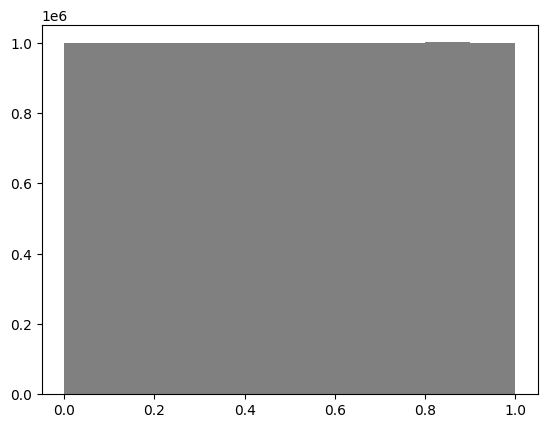

In [11]:
# 一様分布からの擬似乱数の発生
plt.hist(np.random.random(10000000), color="gray")

#### 確率変数
* 離散確率変数
    * ベルヌーイ分布
* 連続確率変数
    * 一様分布
    * 正規分布

(array([  5.,  20., 105., 177., 282., 220., 144.,  37.,   7.,   3.]),
 array([447. , 458.4, 469.8, 481.2, 492.6, 504. , 515.4, 526.8, 538.2,
        549.6, 561. ]),
 <BarContainer object of 10 artists>)

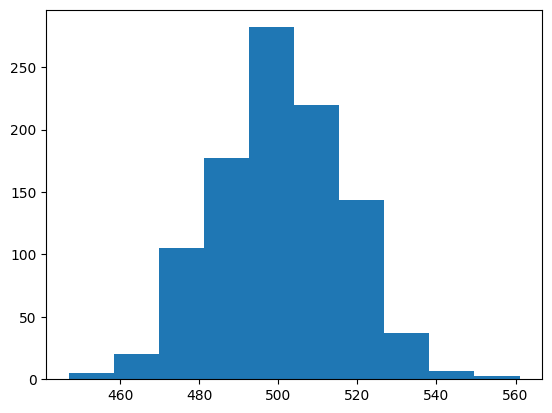

In [36]:
# コインで表が出る数の分布
all_sum = list()
n = 1000  # 　試行回数

for _ in range(1000):
    sum_ = 0
    for _ in range(n):
        sum_ += (
            np.random.random() > 0.5
        )  # 一様乱数を閾値(p:0.5)で切って「離散化」することでベルヌーイ試行を実現している
    all_sum.append(sum_)
plt.hist(all_sum)

(array([418., 238., 157.,  84.,  46.,  26.,  19.,   8.,   3.,   1.]),
 array([   0. ,  558.7, 1117.4, 1676.1, 2234.8, 2793.5, 3352.2, 3910.9,
        4469.6, 5028.3, 5587. ]),
 <BarContainer object of 10 artists>)

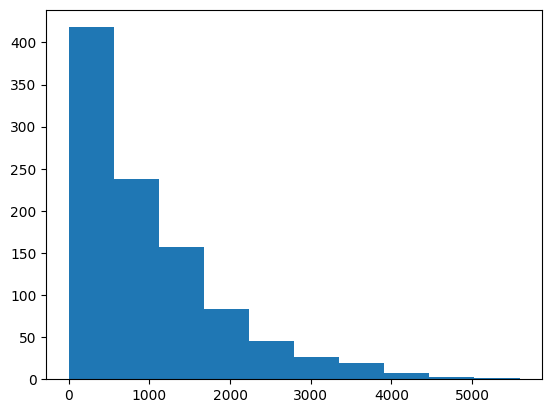

In [45]:
# 毎回確率が0.001で当たるクジを最大10000回引く時、何回目で当たりを引くかの分布
all_sum = list()
for _ in range(1000):
   for i in range(10000): 
    if np.random.random() < 0.001:
        all_sum.append(i)
        break

plt.hist(all_sum)

(array([ 18.,  41.,  90., 178., 202., 204., 164.,  61.,  35.,   7.]),
 array([-2.68113099, -2.13095341, -1.58077584, -1.03059826, -0.48042068,
         0.06975689,  0.61993447,  1.17011205,  1.72028963,  2.2704672 ,
         2.82064478]),
 <BarContainer object of 10 artists>)

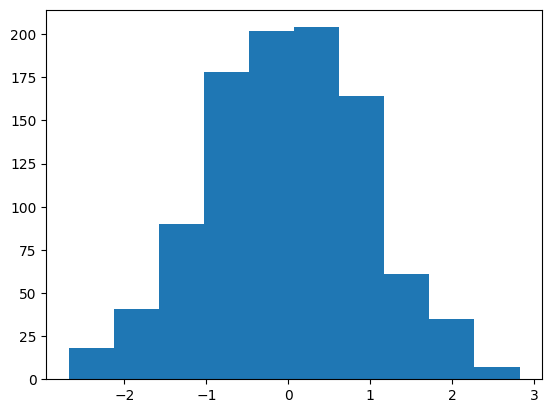

In [47]:
# 正規分布　平均値を中心に左右対称になる（物理的な世界でよく現れる分布らしい）
plt.hist(np.random.normal(size=1000))　　# 標準正規分布に従う乱数を指定された数（この場合は1000個）生成